array([ True])

,tB,tBB,tDW,tDC,tH,tFPTASeps0.01,tFPTASeps0.05,tFPTASeps0.1,tFPTASeps0.2,tFPTASeps0.3,...,errFPTASeps0.2,errFPTASeps0.3,errFPTASeps0.4,errFPTASeps0.5,errFPTASeps0.6,errFPTASeps0.7,errFPTASeps0.8,errFPTASeps0.9,errFPTASeps0.95,errFPTASeps0.99
n,,,,,,,,,,,,,,,,,,,,,
4,0.054338,0.040975,0.109995,0.127998,0.020902,0.140606,0.134838,0.134146,0.132544,0.131533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,errH,errFPTASeps0.01,errFPTASeps0.05,errFPTASeps0.1,errFPTASeps0.2,errFPTASeps0.3,errFPTASeps0.4,errFPTASeps0.5,errFPTASeps0.6,errFPTASeps0.7,errFPTASeps0.8,errFPTASeps0.9,errFPTASeps0.95,errFPTASeps0.99
n,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


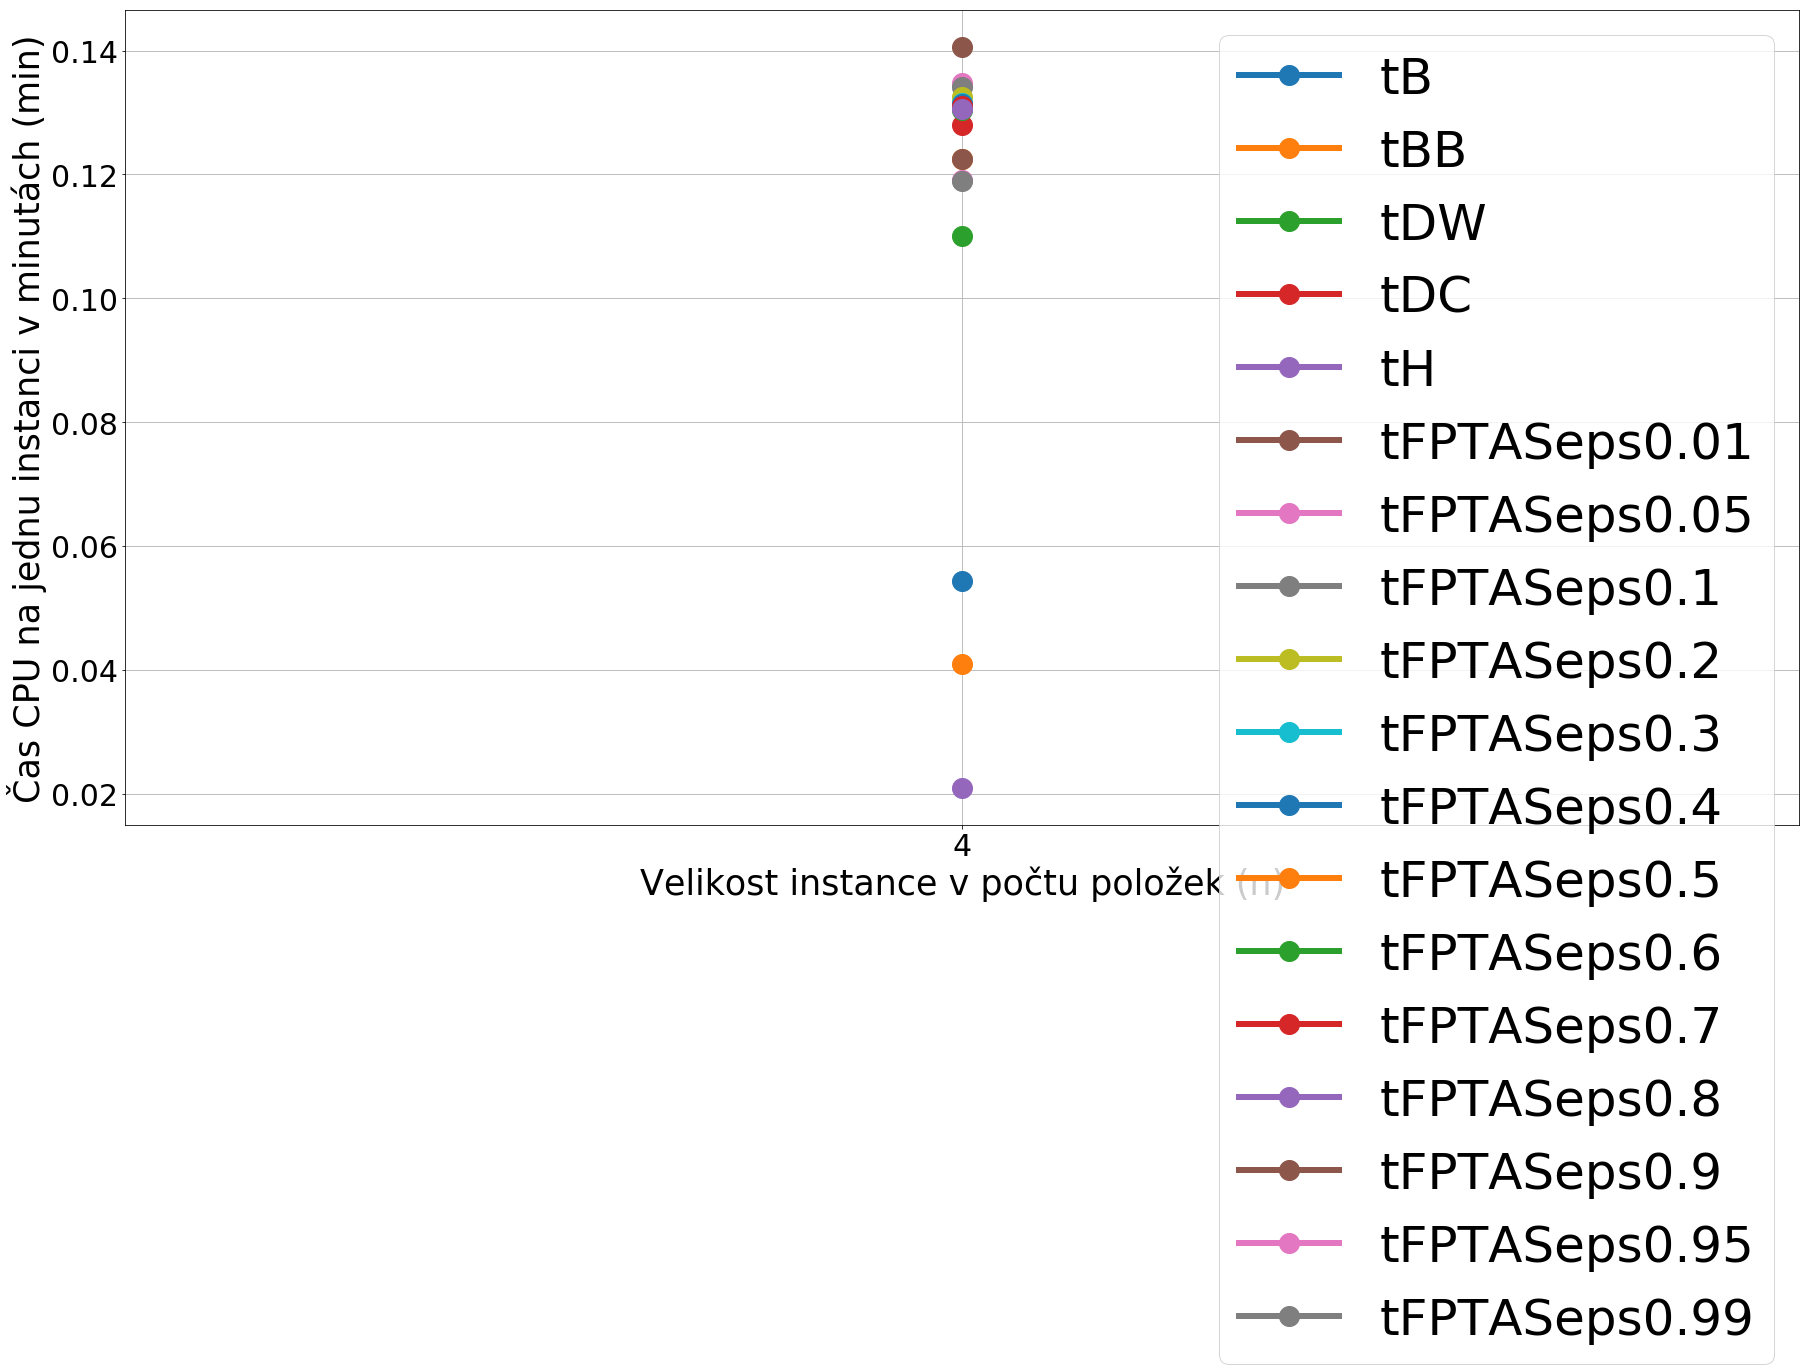

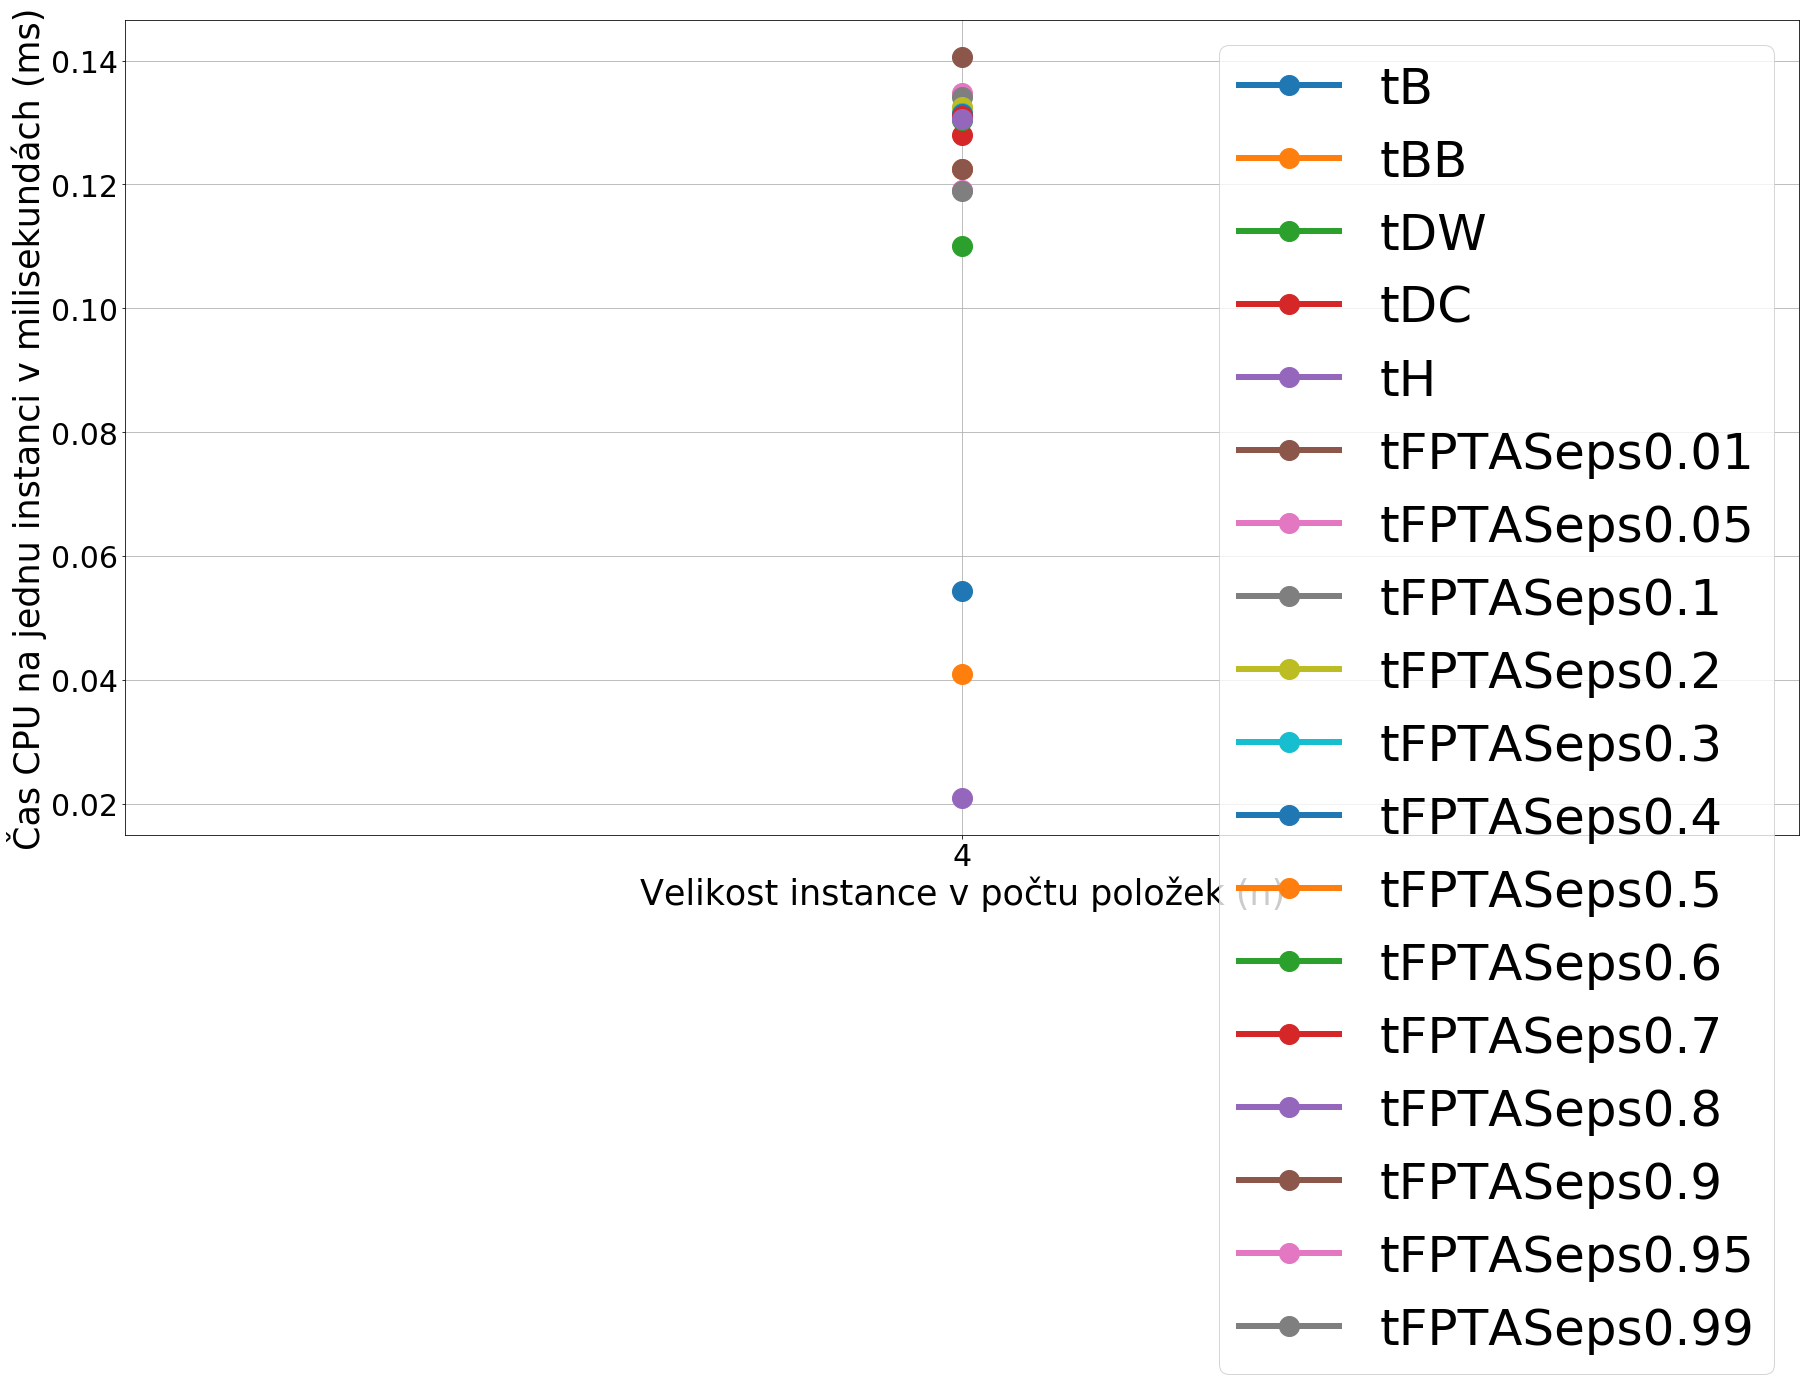

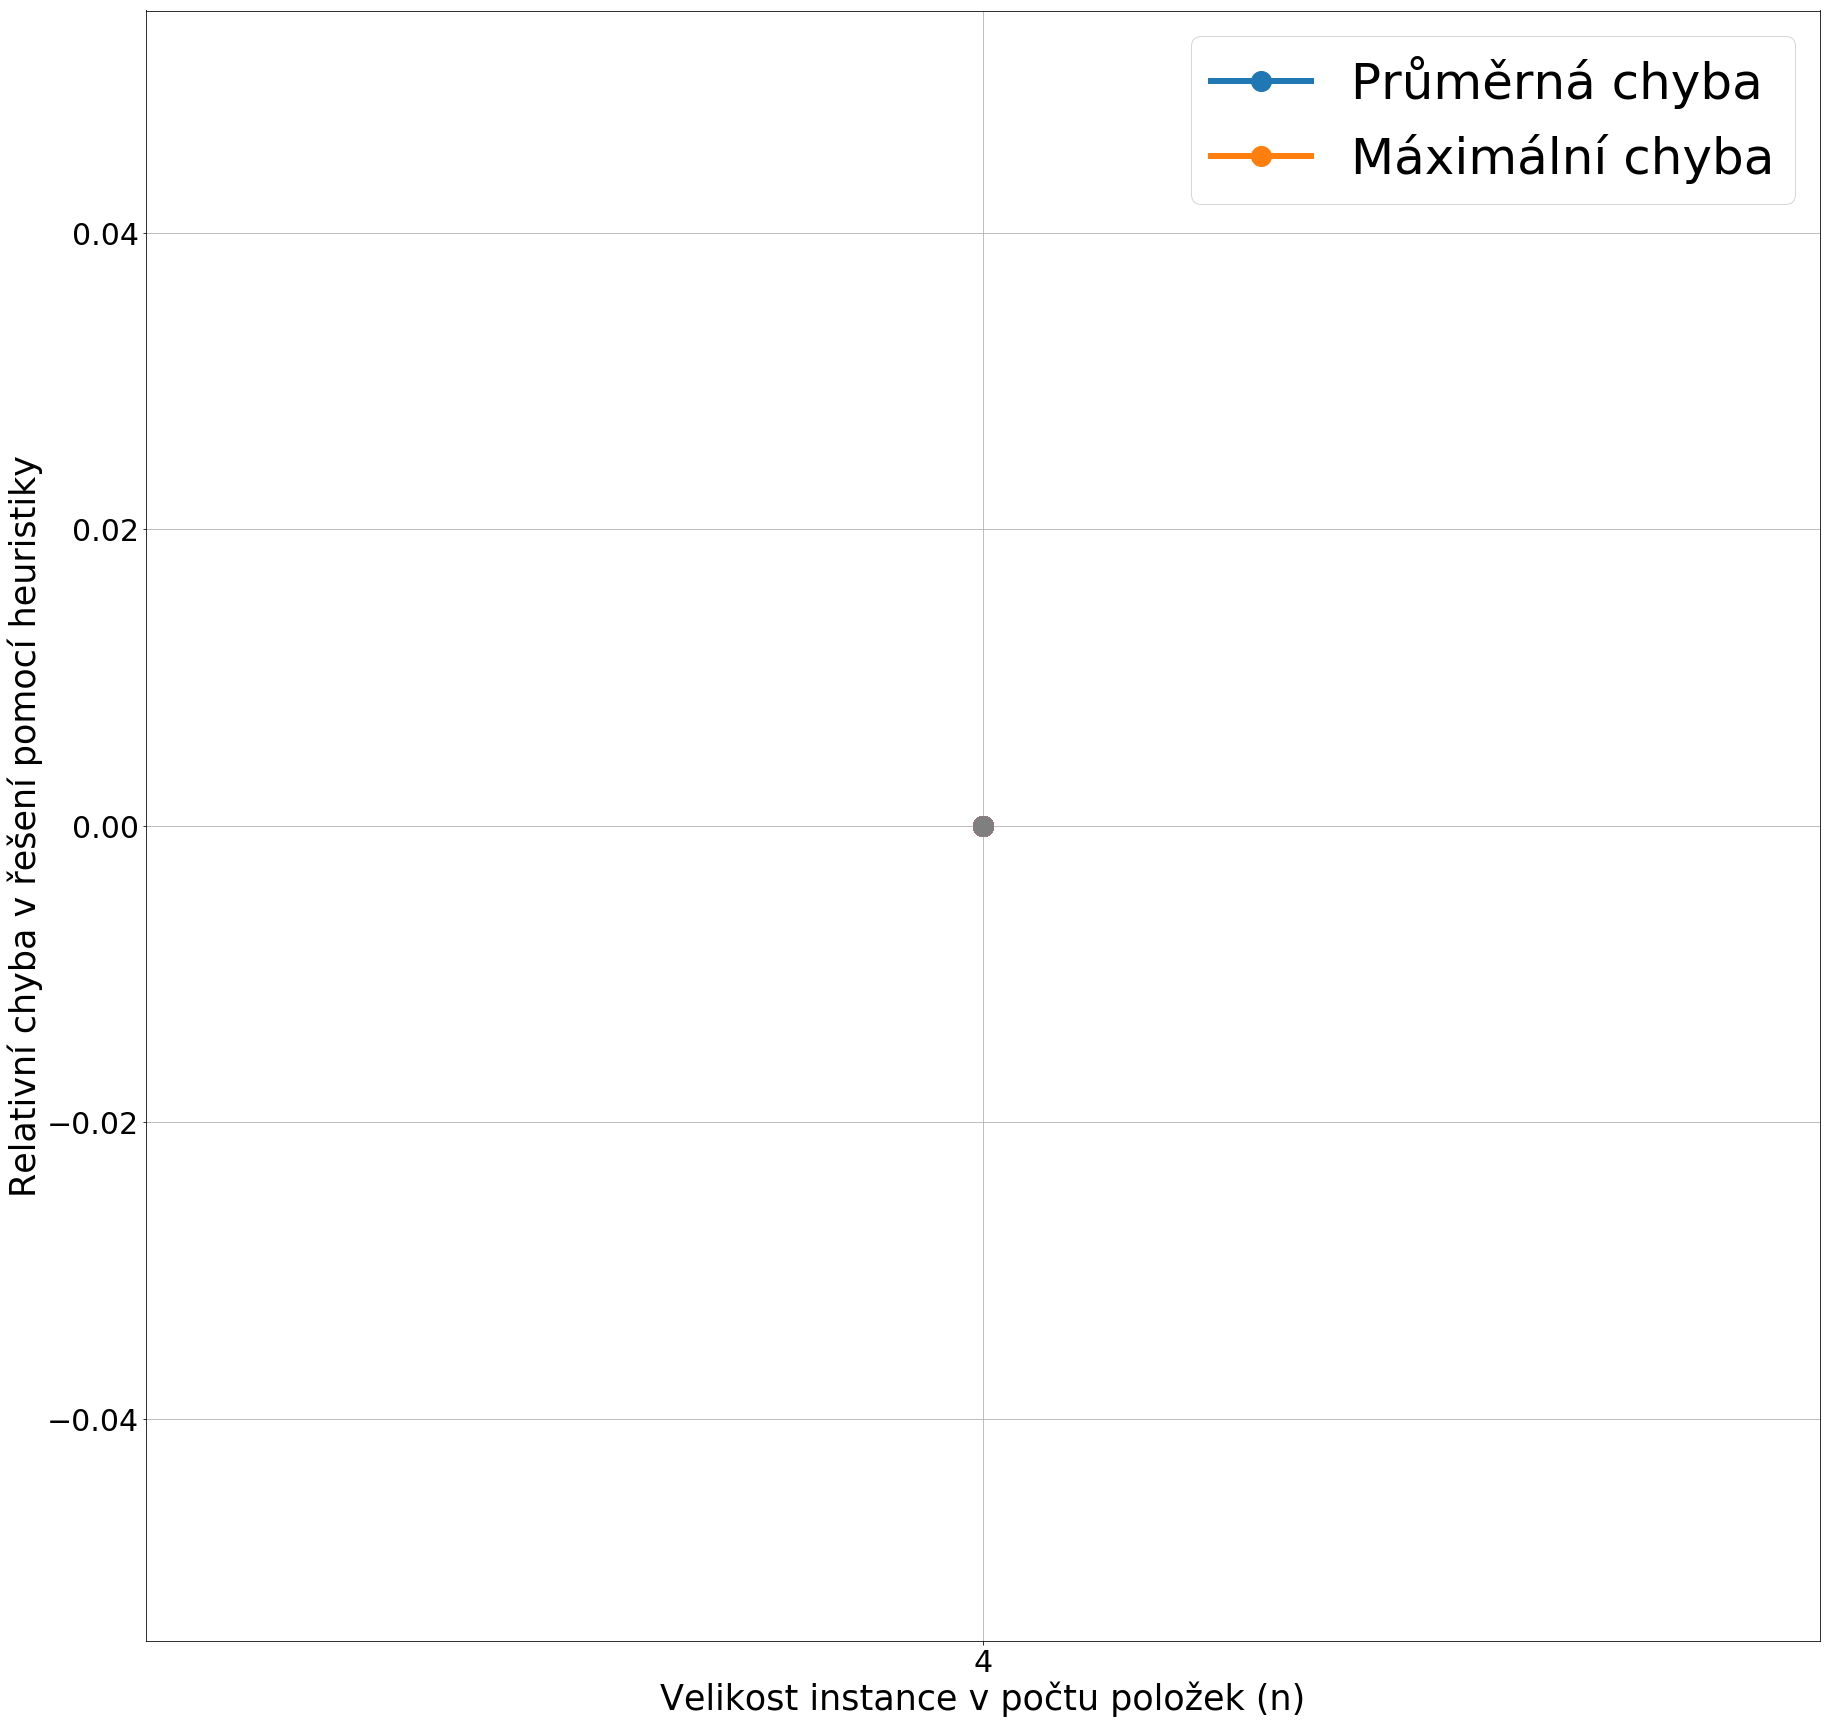

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

RAW_DATA = pd.read_csv('stats.txt').reset_index(drop=True)
display(RAW_DATA['brutOK'].unique())
time = ['tB','tBB','tDW','tDC','tH','tFPTASeps0.01','tFPTASeps0.05','tFPTASeps0.1','tFPTASeps0.2','tFPTASeps0.3',\
        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.6','tFPTASeps0.7','tFPTASeps0.8','tFPTASeps0.9','tFPTASeps0.95',\
        'tFPTASeps0.99']
err = ['errH','errFPTASeps0.01','errFPTASeps0.05','errFPTASeps0.1','errFPTASeps0.2','errFPTASeps0.3',\
       'errFPTASeps0.4','errFPTASeps0.5','errFPTASeps0.6','errFPTASeps0.7','errFPTASeps0.8','errFPTASeps0.9',\
       'errFPTASeps0.95','errFPTASeps0.99']

df = RAW_DATA.groupby(['n'], as_index=False).mean().groupby('n')[(time+err)].mean()
df1 = RAW_DATA.groupby(['n'], as_index=False).max().groupby('n')[err].max()

#df = pd.DataFrame(df)
#display(df.head())
#df1 = pd.DataFrame(df1)
#display(df1.head())

#df['timeBrut'] = df['timeBrut']/1000/60
#df['timeHeu'] = df['timeHeu']

fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df.index, df[time] ,  marker='o', linewidth=6, markersize=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(time, fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Brute-force řešení. Časová náročnost.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Čas CPU na jednu instanci v minutách (min)", size = 35)
plt.grid()
plt.show()
fig.savefig("1.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df.index, df[time],  marker='o', linewidth=6, markersize=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(time, fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Řešení pomocí heuristiky. Časová náročnost.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Čas CPU na jednu instanci v milisekundách (ms)", size = 35)
plt.grid()
plt.show()
fig.savefig("2.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30,30))
ax.plot(df.index, df[err] , df1[err],  marker='o', linewidth=6, markersize=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(['Průměrná chyba', 'Máximální chyba'], fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Řešení pomocí heuristiky. Velikost relativní chyby.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Relativní chyba v řešení pomocí heuristiky", size = 35)
plt.grid()
plt.show()

fig.savefig("3.pdf", bbox_inches='tight')
